In [69]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim  as optim
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tqdm import tqdm
from skimage import transform,io

train=datasets.MNIST("",train=True,download=True,transform=transforms.Compose([
    transforms.ToTensor()
]))

test=datasets.MNIST("",train=False,download=True,transform=transforms.Compose([
    transforms.ToTensor()
]))

trainset= torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset= torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [70]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784, 64, bias=True) #Fully conected layer 1
        self.fc2=nn.Linear(64, 64, bias=True)
        self.fc3=nn.Linear(64, 64, bias=True)
        self.fc4=nn.Linear(64, 10, bias=True)
    
    def forward(self,x):
        x= F.relu(self.fc1(x)) 
        x= F.relu(self.fc2(x))
        x= F.relu(self.fc3(x)) 
        x= self.fc4(x)
        return F.softmax(x, dim=1)    
        
net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [71]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS=3

for epoch in range(EPOCHS):
    for data in tqdm(trainset):
        X,y=data
         #Spliting the trainset into inputs(X) and outputs(y)
        net.zero_grad()
        output=net(X.view(-1,28*28))
            #Pass the data throught the network
        
        #Ahora se calcula cuanto error hubo.
        loss = F.nll_loss(output, y)
        
        loss.backward()
        
        optimizer.step()
            #This is what adjust the weights for us
    print(loss)

  0%|          | 24/6000 [00:00<00:27, 214.15it/s]

tensor(-0.9999, grad_fn=<NllLossBackward>)


  0%|          | 23/6000 [00:00<00:29, 200.48it/s]

tensor(-0.8000, grad_fn=<NllLossBackward>)


100%|██████████| 6000/6000 [00:29<00:00, 204.85it/s]

tensor(-1., grad_fn=<NllLossBackward>)


In [72]:
correct=0
total=0

with torch.no_grad():
    # No queremos calcular los gradientes, solo queremos saber que tan buena es la red en este punto.
    for data in tqdm(trainset):
        X,y=data
        output=net(X.view(-1,28*28))
        for idx,i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                # argmax Returns the indices of the maximum values along an axis.
                correct +=1
            total+=1
            
print('Accuracy: ',round(correct/total,3))

100%|██████████| 6000/6000 [00:12<00:00, 479.53it/s]

Accuracy:  0.855


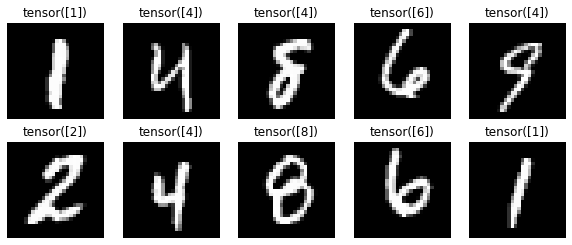

In [73]:
for data in testset:
        x_test,y_test=data
        
nx,ny,c=5,2,0
fig, axs = plt.subplots(ny,nx)
fig.set_size_inches(nx*2, 4)
for i in range(nx):
    for j in range(ny):
        prueba=x_test[c][0]
        output_prueba=net(prueba.view(1,28*28))
        _,salida=torch.max(output_prueba,1)
        axs[j,i].imshow(prueba, cmap="gray")
        axs[j,i].axis('off')
        axs[j,i].set_title(str(salida))
        c+=1

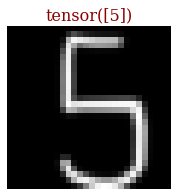

In [91]:
# read in grey-scale
grey = io.imread('try.png', as_gray=True)
# resize to 28x28
small_grey = transform.resize(grey, (28,28), mode='symmetric', preserve_range=True)

input_img = torch.Tensor([i for i in small_grey])

output_try=net(input_img.view(1,28*28))

idx,salida=torch.max(output_try,1)


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.figure(figsize = (3,3))
plt.imshow(input_img, cmap='gray')
plt.title(str(salida),  fontdict=font)
plt.axis('off')
plt.show()